In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
file = open('data_description.txt','r')
print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
features = ['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']
target = train_data['SalePrice']

In [6]:
clean_data = train_data[features]
clean_test = test_data[features]

In [7]:
clean_data.isnull().sum()

LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [8]:
for i in features:
    print(clean_data[i].dtype)

int64
int64
int64
int64
int64
int64


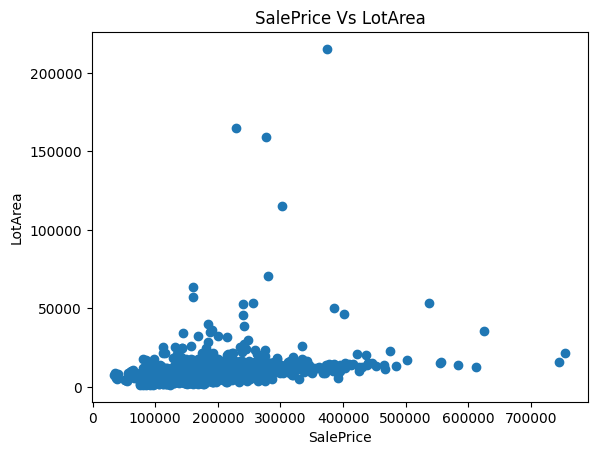

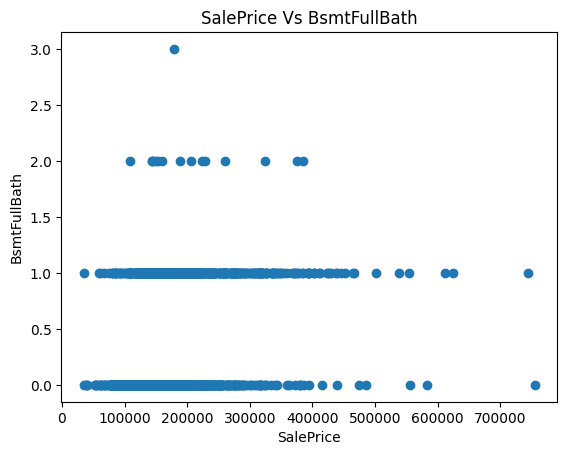

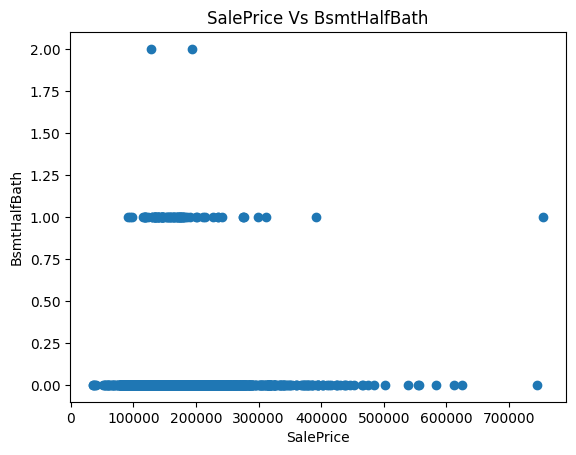

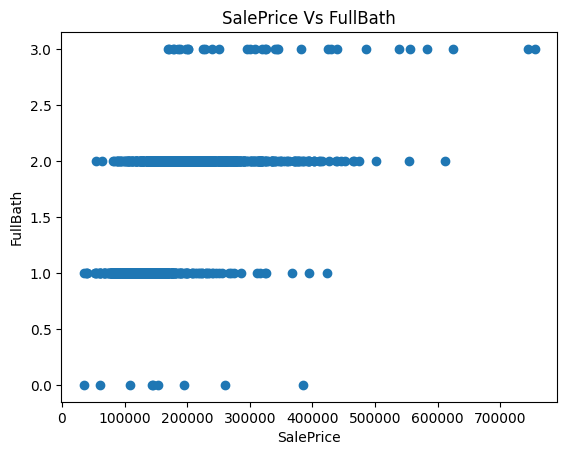

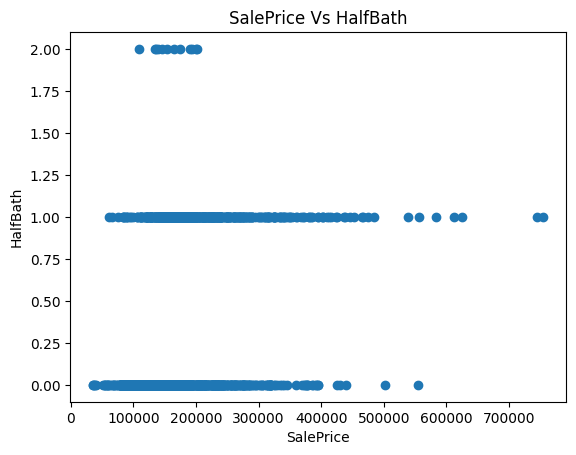

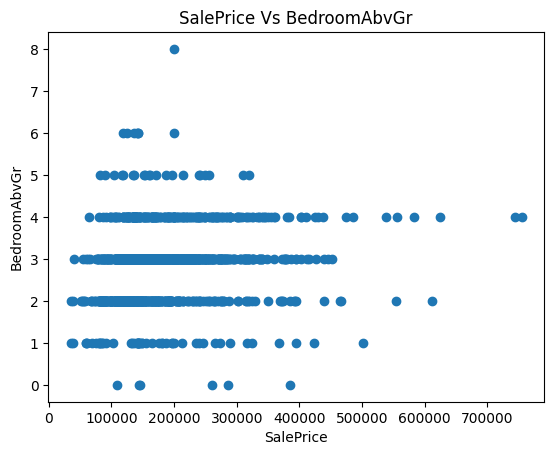

In [9]:
for i in features:
    plt.scatter(target, clean_data[i])
    plt.title(f'SalePrice Vs {i}')
    plt.xlabel('SalePrice')
    plt.ylabel(i)
    plt.show()

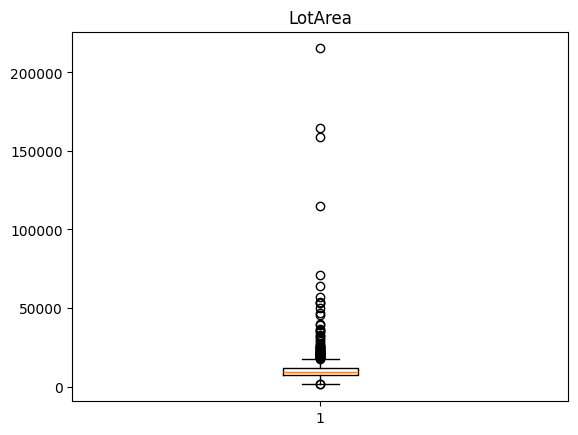

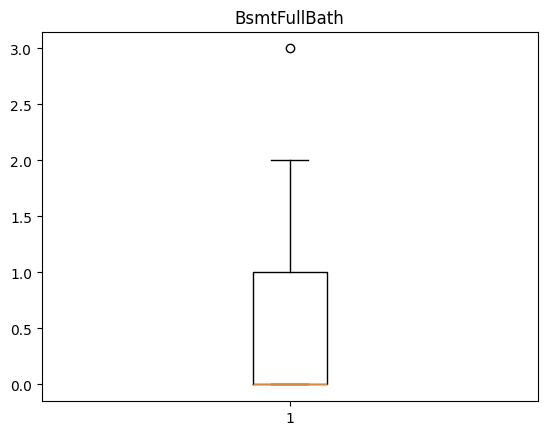

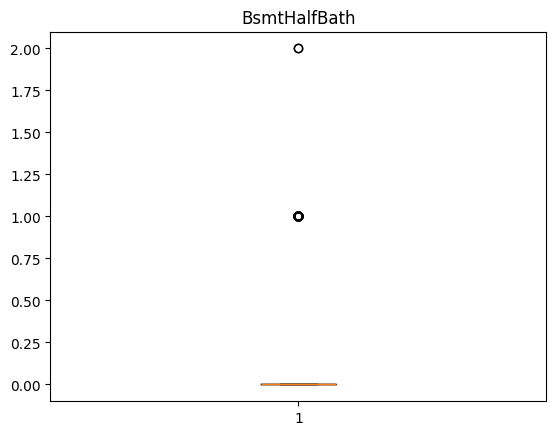

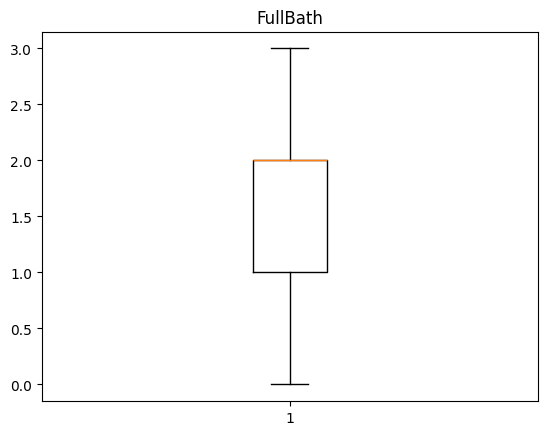

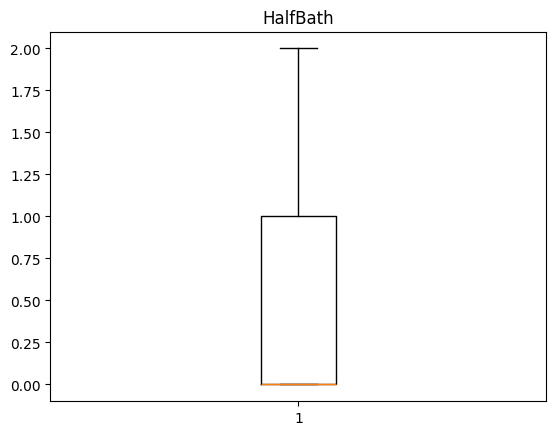

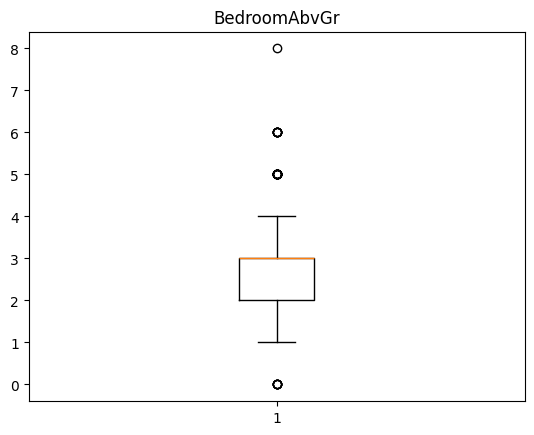

In [10]:
for i in features:
    plt.boxplot(clean_data[i])
    plt.title(i)
    plt.show()

In [11]:
clean_data.head()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,8450,1,0,2,1,3
1,9600,0,1,2,0,3
2,11250,1,0,2,1,3
3,9550,1,0,1,0,3
4,14260,1,0,2,1,4


In [12]:
clean_test.isnull().sum()

LotArea         0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [13]:
clean_test['BsmtHalfBath'] = clean_test['BsmtHalfBath'].replace(np.nan,0)
clean_test['BsmtFullBath'] = clean_test['BsmtFullBath'].replace(np.nan,0)


/tmp/ipykernel_9307/3512549620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_test['BsmtHalfBath'] = clean_test['BsmtHalfBath'].replace(np.nan,0)
/tmp/ipykernel_9307/3512549620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_test['BsmtFullBath'] = clean_test['BsmtFullBath'].replace(np.nan,0)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(clean_data,target)

LinearRegression()

In [15]:
Submission = pd.DataFrame(test_data['Id'])
Submission['SalePrice'] = model.predict(clean_test)

In [16]:
Submission.head()

,Id,SalePrice
0,1461,112606.119798
1,1462,145550.485519
2,1463,224695.030921
3,1464,219826.657600
4,1465,183940.035105


In [17]:
Submission.to_csv('submission.csv')